In [1]:
# 불필요한 경고 출력을 방지
import warnings
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd

## 실습에 주로 활용할 데이터 셋

sklearn.dataset 에서 제공해주는 다양한 샘플 데이터 활용  
[참고 : sklearn.datasets](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets)

### iris 데이터셋 
꽃 종류 분류하기  
[iris 데이터셋](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris)

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
# iris 데이터셋 로드
iris = load_iris()

**iris feature 설명**
* `DESCR`: 데이터셋의 정보를 보여줍니다.
* `data`: feature data.
* `feature_names`: feature data의 컬럼 이름
* `target`: label data (수치형)
* `target_names`: label의 이름 (문자형)

In [ ]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
data = iris['data']
data[-5:]

array([[6.7, 3. , 5.2, 2.3],
       [6.3, 2.5, 5. , 1.9],
       [6.5, 3. , 5.2, 2. ],
       [6.2, 3.4, 5.4, 2.3],
       [5.9, 3. , 5.1, 1.8]])

In [ ]:
feature_names = iris['feature_names']
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

* **sepal**: 꽃 받침
* **petal**: 꽃잎

In [ ]:
target = iris['target']
target[:5]

array([0, 0, 0, 0, 0])

In [ ]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### 데이터프레임 만들기

In [ ]:
df_iris = pd.DataFrame(data, columns=feature_names)

In [ ]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df_iris['target'] = target

In [ ]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### 시각화

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

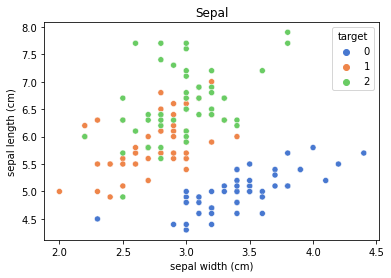

In [ ]:
#sns.scatterplot(data=df_iris, x='sepal width (cm)', y='sepal length (cm)', hue='target')
#sns.scatterplot(data=df_iris, x='sepal width (cm)', y='sepal length (cm)', hue='target', palette='brg')
sns.scatterplot(data=df_iris, x='sepal width (cm)', y='sepal length (cm)', hue='target', palette='muted')
plt.title('Sepal')
plt.show()
#'petal length (cm)', 'petal width (cm)',

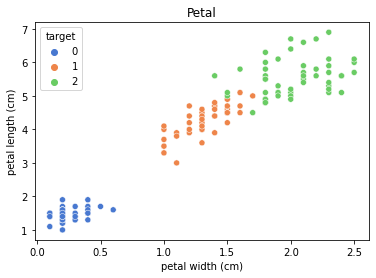

In [ ]:
sns.scatterplot(data=df_iris, x='petal width (cm)', y='petal length (cm)', hue='target', palette='muted')
plt.title('Petal')
plt.show()

### 데이터 불균형 확인 

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df_iris.drop('target', axis=1)

In [ ]:
y = df_iris['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
X_train.shape, y_train.shape

((112, 4), (112,))

In [ ]:
X_test.shape, y_test.shape

((38, 4), (38,))

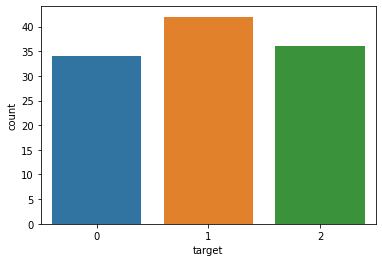

In [ ]:
sns.countplot(y_train)

label의 클래스의 분포를 균등하게 배분함.
샘플을 균등하게 하지 않으면 편향된 예측을 할 수 있음.  
stratify = feature column


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10, stratify=y)

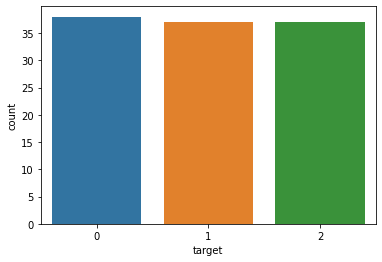

In [ ]:
sns.countplot(y_train)

In [ ]:
X_train.shape, y_train.shape

((112, 4), (112,))

In [ ]:
X_test.shape, y_test.shape

((38, 4), (38,))

# 지도학습 알고리즘 이해 및 실습

## 의사 결정 나무 (Decision Tree)
스무고개 처럼 질문에 True or False로 판별하여, 바이너리 트리 형태로 가지치기를 하여 결정함  
[Decision Tree scikit-learning 문서 참조](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decision%20tree#sklearn.tree.DecisionTreeClassifier)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/fe/CART_tree_titanic_survivors_KOR.png/350px-CART_tree_titanic_survivors_KOR.png">

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model_dtc = DecisionTreeClassifier(random_state=0)
model_dtc

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
model_dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
pred_dtc = model_dtc.predict(X_test)
pred_dtc

array([1, 1, 2, 2, 2, 1, 0, 2, 2, 0, 1, 1, 2, 1, 0, 2, 0, 1, 0, 0, 2, 2,
       0, 1, 2, 0, 2, 2, 1, 2, 0, 0, 0, 1, 1, 1, 0, 2])

In [ ]:
(pred_dtc == y_test).mean()

0.9736842105263158

In [ ]:
pred_dtc[:5]

array([1, 1, 2, 2, 2])

In [ ]:
y_test[:5].values

array([1, 1, 2, 2, 2])

#### export_graphviz 라이브러리 : Decision Tree Graph display 
- graphviz 패키지 설치  
!python3.8 -m pip install graphviz (for python3.8)

In [ ]:
from sklearn.tree import export_graphviz
from subprocess import call

In [ ]:
def graph_tree(model):
    # .dot 파일로 export 함
    export_graphviz(model, out_file='tree.dot')
    # 생성된 .dot 파일을 .png로 변환
    call(['dot', '-Tpng', 'tree.dot', '-o', 'decistion-tree.png', '-Gdpi=600'])
    # .png 출력
    return Image(filename = 'decistion-tree.png', width=600)

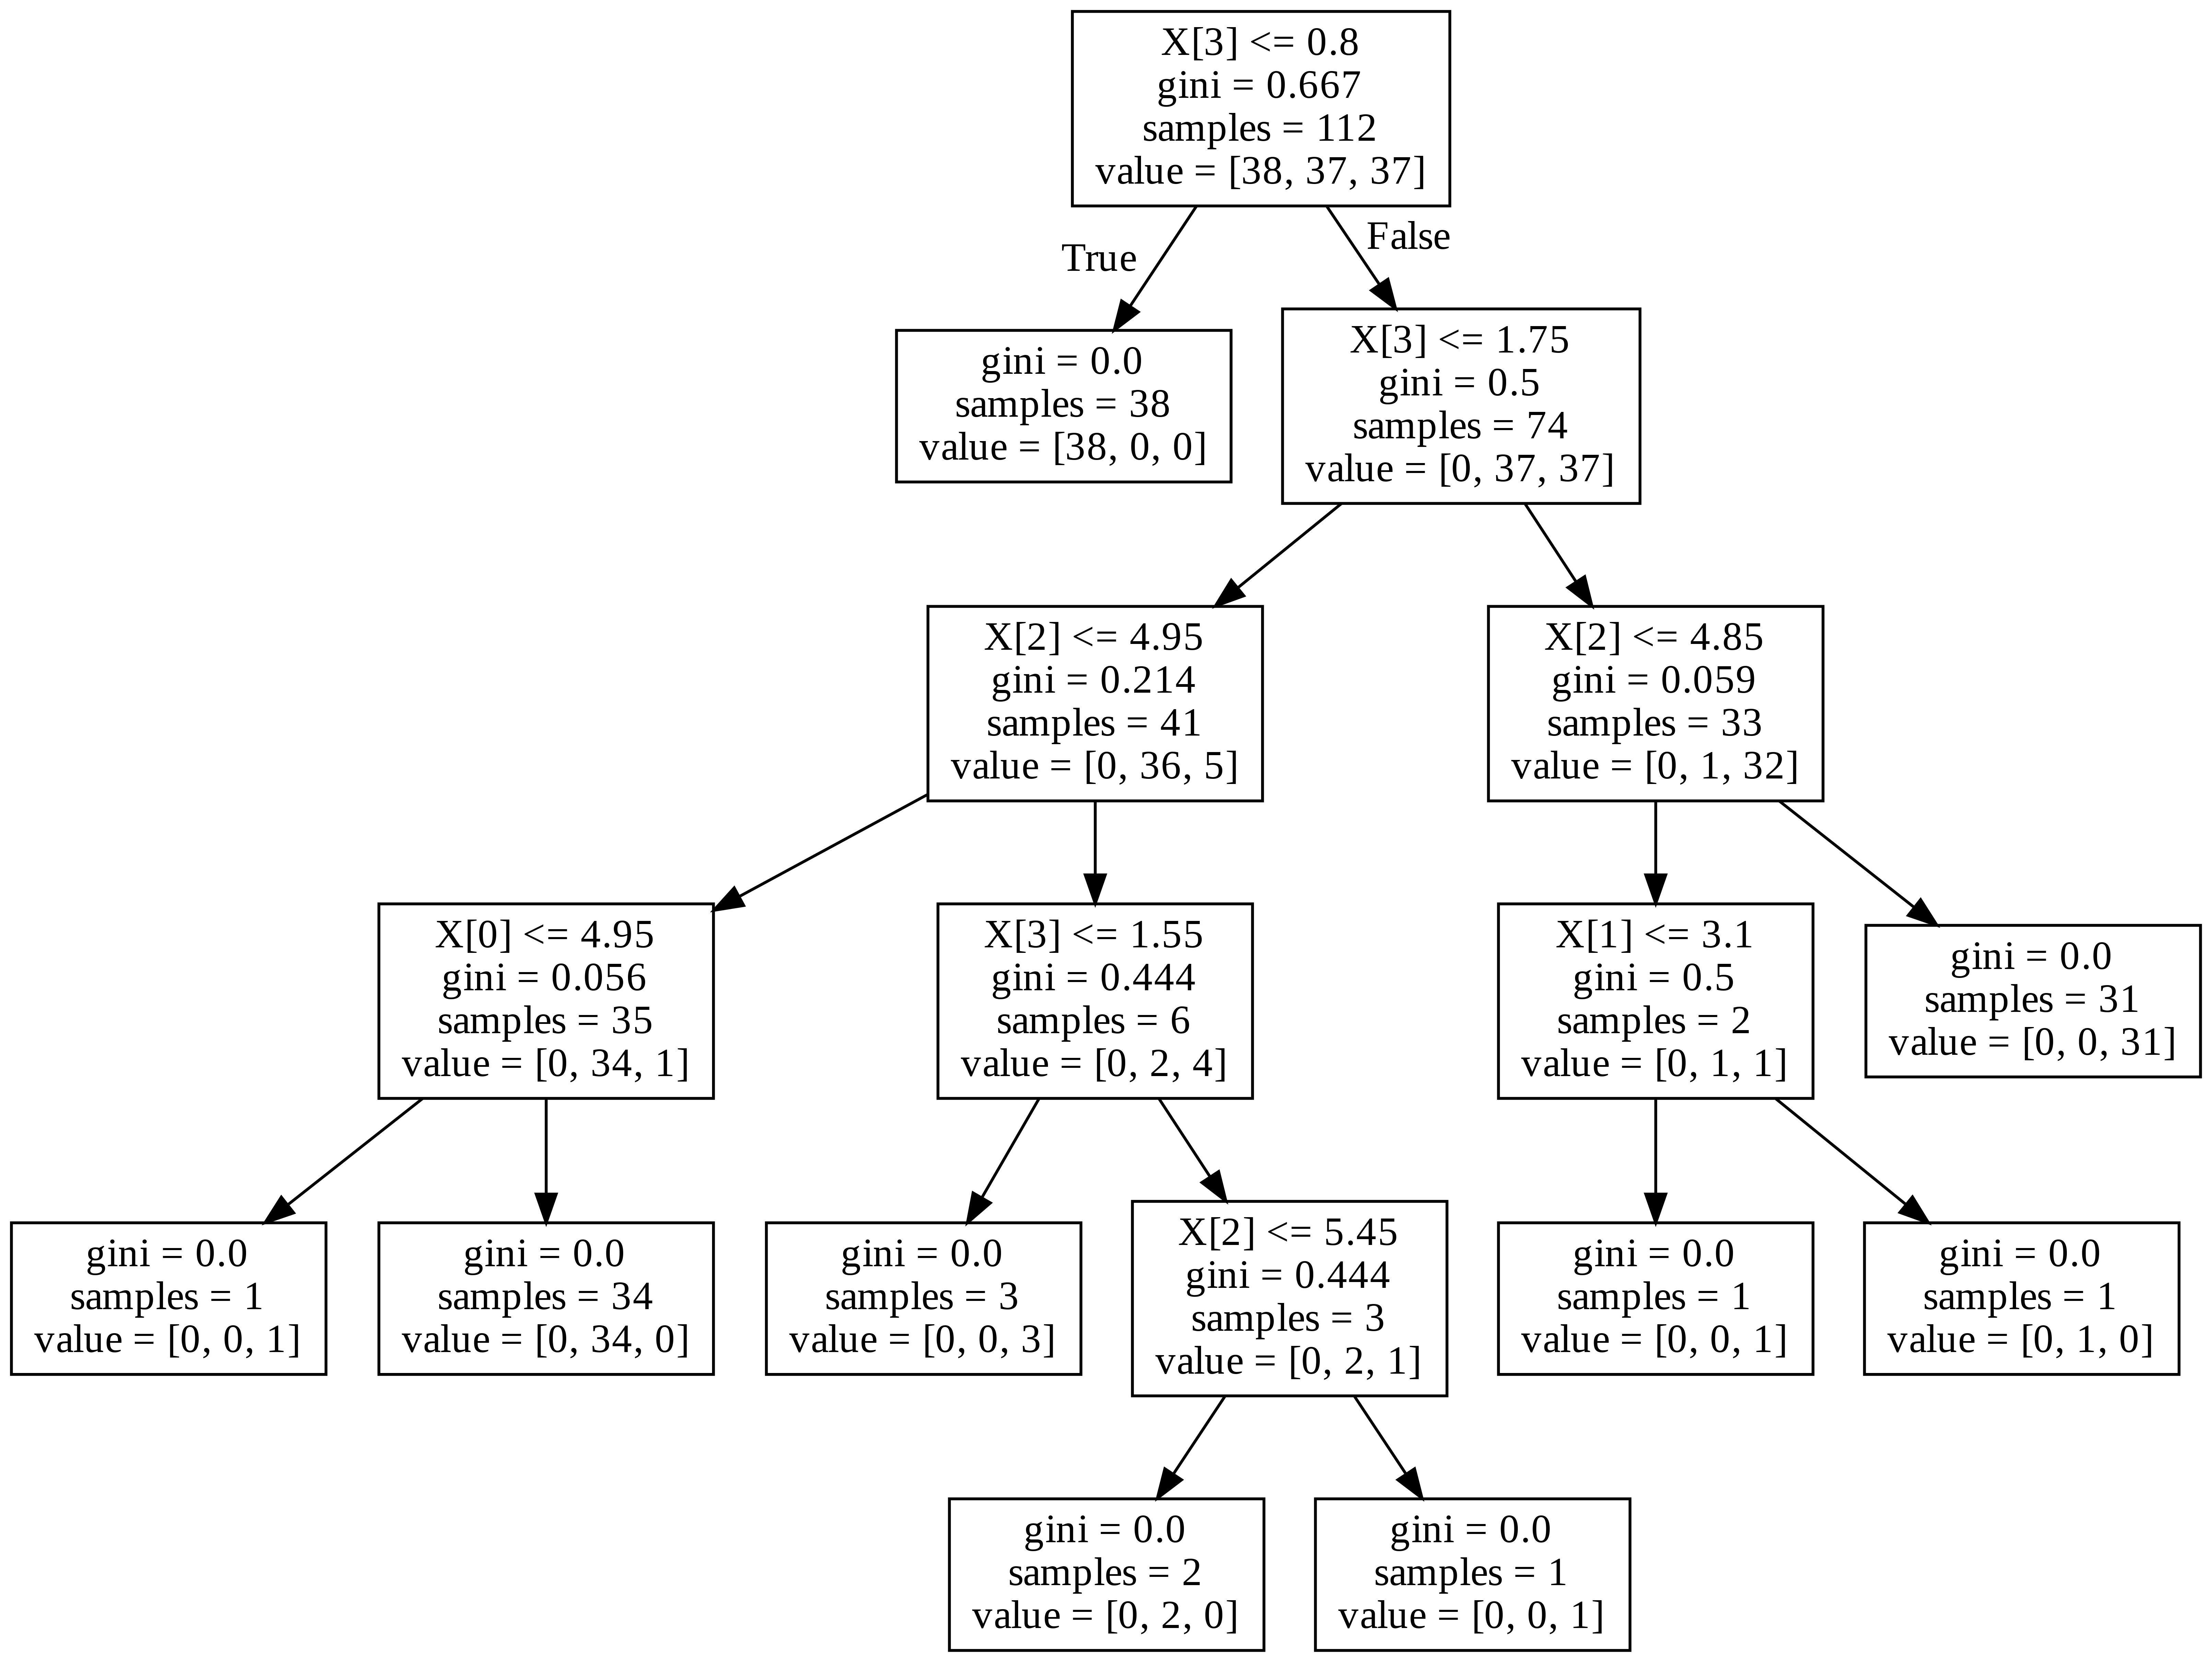

In [ ]:
graph_tree(model_dtc)

gini계수: 불순도를 의미하며, 계수가 높을 수록 엔트로피가 큼.  
엔트로피가 크다는 의미는 클래스가 혼잡하게 섞여 있다는 뜻임.

In [ ]:
# max_depth=3으로 설정
model_dtc = DecisionTreeClassifier(max_depth=3)
model_dtc.fit(X_train, y_train)
pred_dtc = model_dtc.predict(X_test)

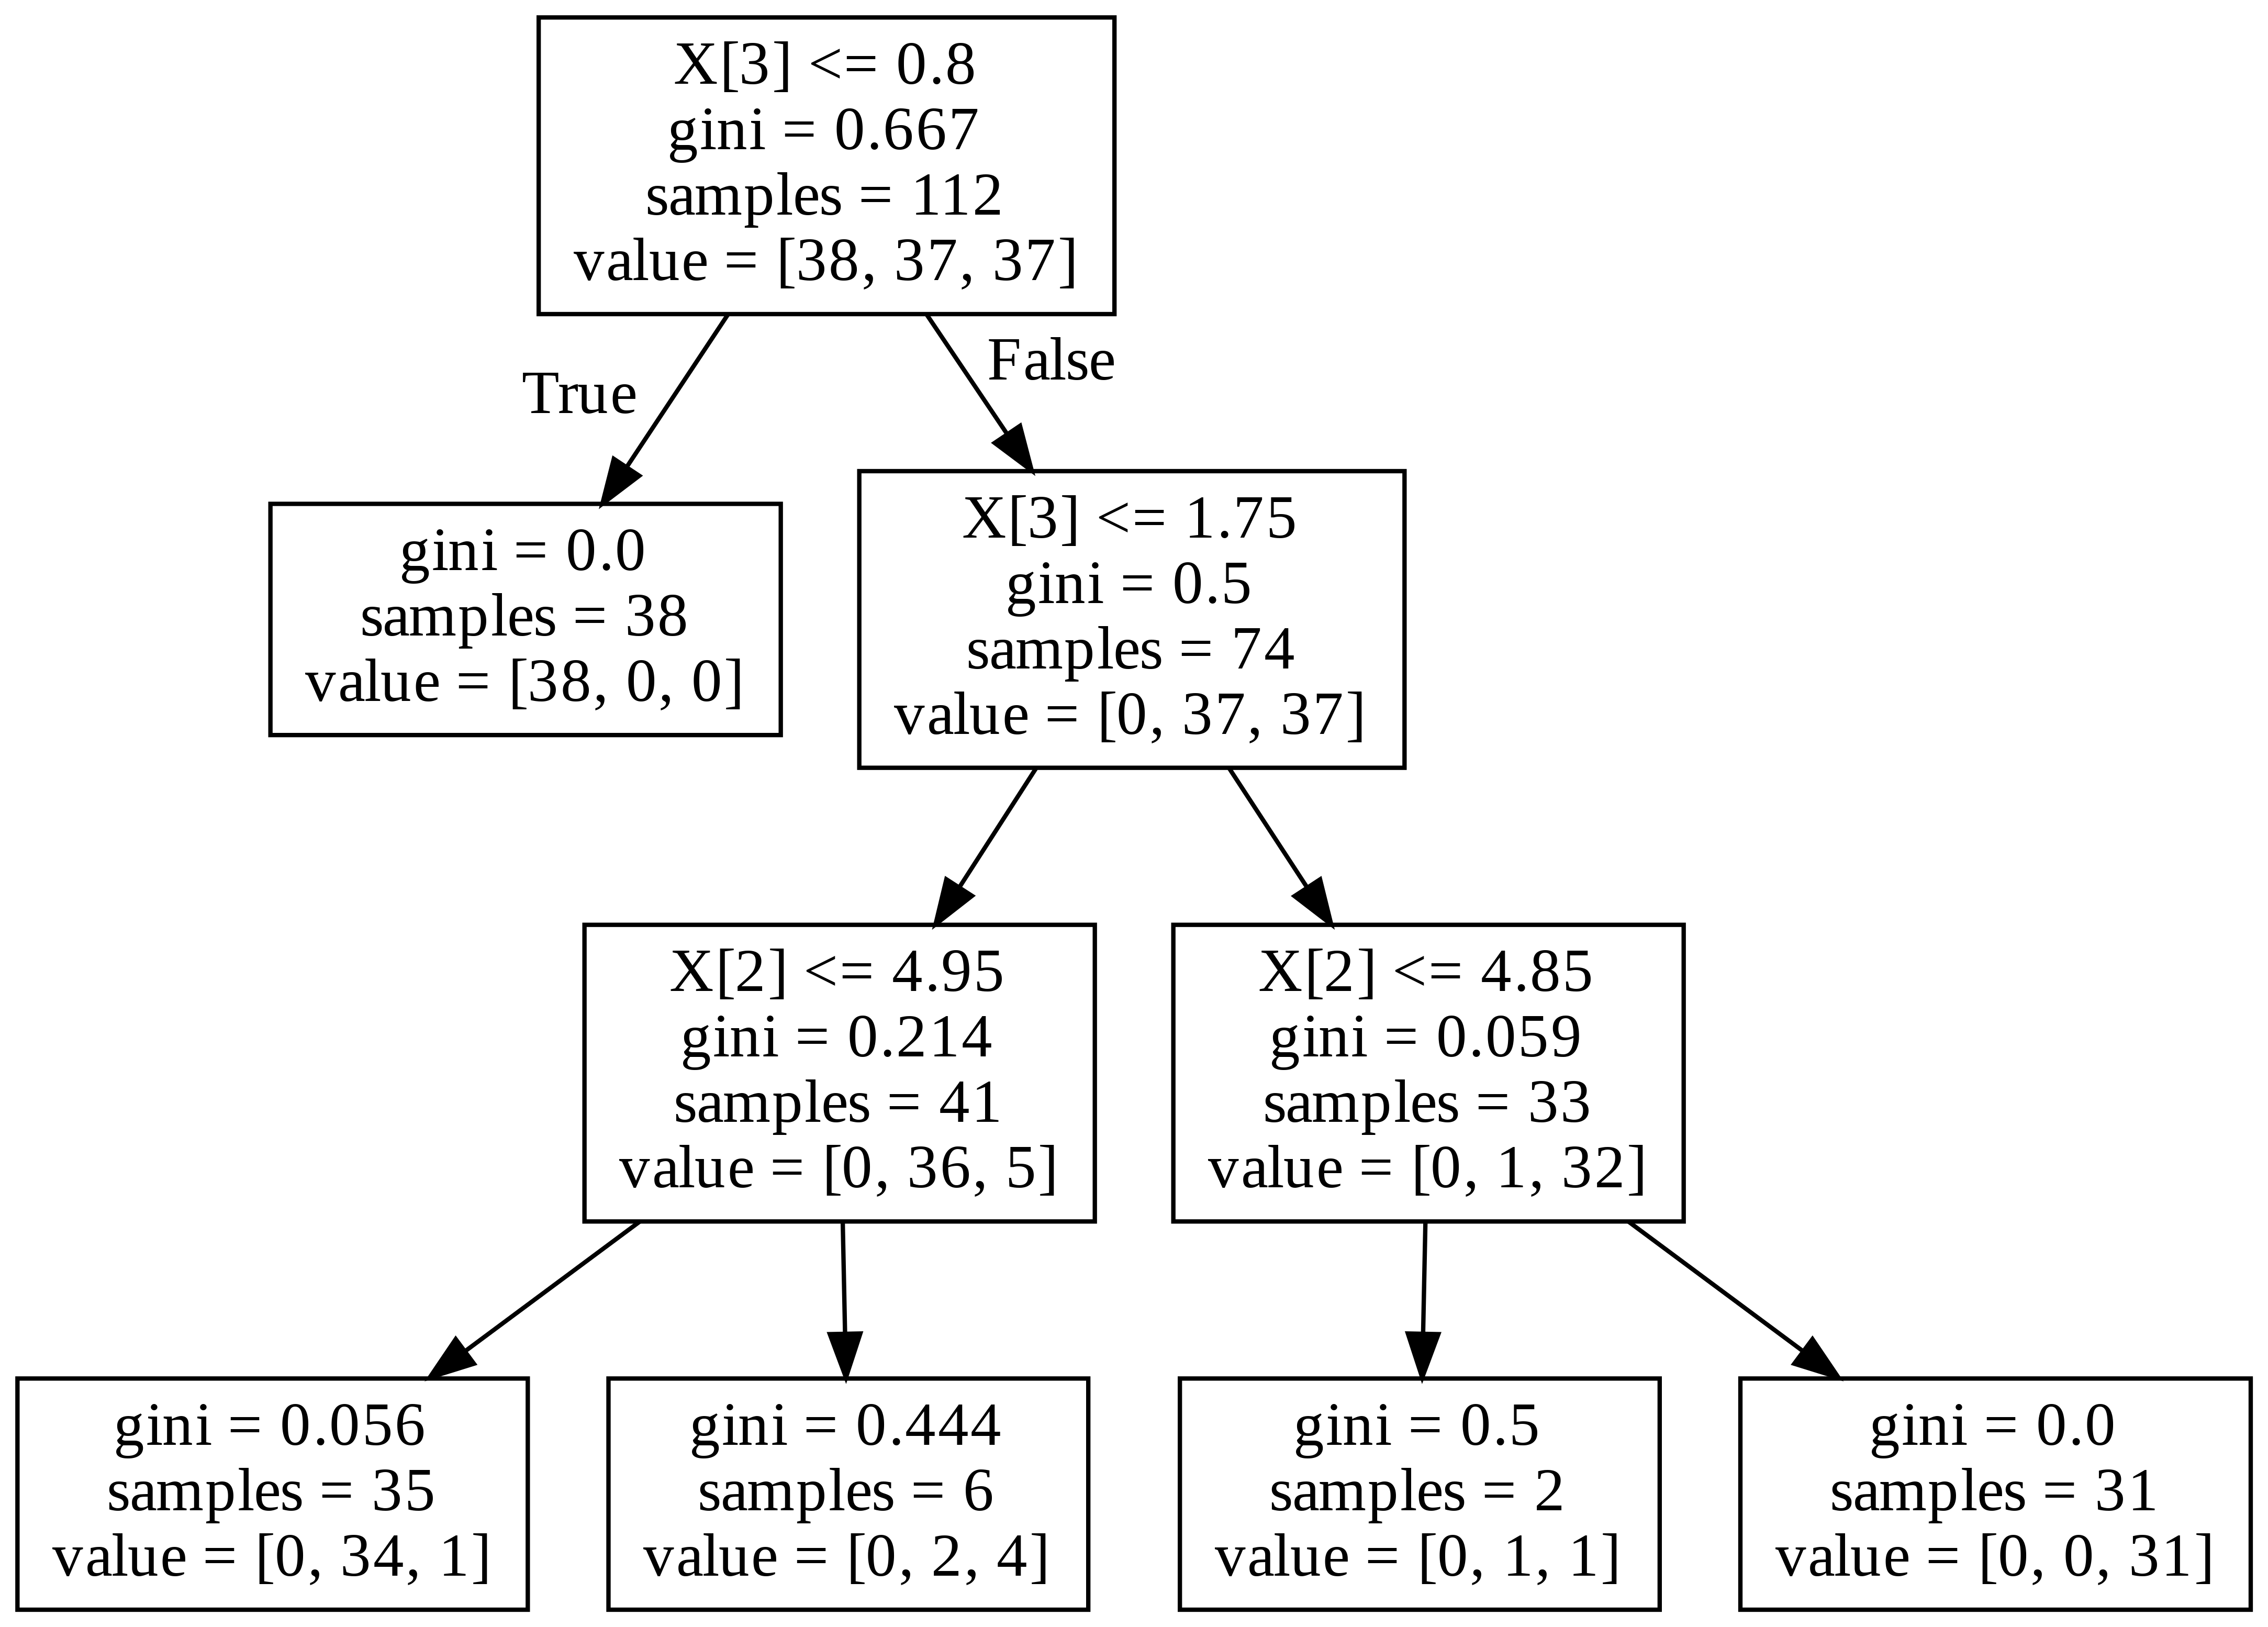

In [ ]:
graph_tree(model_dtc)

## Logistic Regression

[Logistic Regression scikit-learning 문서](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logistic%20regression#sklearn.linear_model.LogisticRegression)

* 로지스틱 회귀(영어: logistic regression)는 영국의 통계학자인 D. R. Cox가 1958년에 제안한 확률 모델
* 독립 변수의 선형 결합을 이용하여 사건의 발생 가능성을 예측하는데 사용되는 통계 기법

<img src="https://t1.daumcdn.net/cfile/tistory/99F325485C7B76BC2B">

- LogisticRegression, 서포트 벡터 머신 (SVM) 과 같은 알고리즘은 이진 분류만 가능. 즉, 2개의 클래스 판별만 가능함.

- 3개 이상의 클래스에 대한 판별을 진행하는 경우, 다음과 같은 전략으로 판별함.

  - **one-vs-rest (OvR)**: K 개의 클래스가 존재할 때, 1개의 클래스를 제외한 다른 클래스를 K개 만들어, 각각의 이진 분류에 대한 확률을 구하고, 총합을 통해 최종 클래스를 판별

  - **one-vs-one (OvO)**: 4개의 계절을 구분하는 클래스가 존재한다고 가정했을 때, 0vs1, 0vs2, 0vs3, ... , 2vs3 까지 NX(N-1)/2 개의 분류기를 만들어 가장 많이 양성으로 선택된 클래스를 판별

  - 일반적으로 **OvsR 전략을 선호** 함.

In [ ]:
from sklearn.linear_model import LogisticRegression

### step1 모델 선언

In [ ]:
model_lr = LogisticRegression()

### step2 모델 학습

In [ ]:
model_lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### step3 예측

In [ ]:
pred_lr = model_lr.predict(X_test)

In [ ]:
pred_lr[:5]

array([1, 1, 2, 2, 2])

### step4 평가

In [ ]:
(pred == y_test).mean()

1.0

## SGDClassifier
stochastic gradient descent (SGD) : 확률적 경사 하강법  
[SGDClassifier scikit-learn 문서](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)

<img src="https://machinelearningnotepad.files.wordpress.com/2018/04/yk1mk.png"  width=500px >

In [ ]:
from sklearn.linear_model import SGDClassifier

###step1 모델 선언

In [ ]:
model_sgd = SGDClassifier()

### step2 모델 학습

In [ ]:
model_sgd.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

###step3 예측

In [ ]:
pred_sgd = model_sgd.predict(X_test)
pred_sgd

array([1, 1, 2, 2, 2, 2, 0, 2, 2, 0, 2, 1, 1, 1, 0, 2, 0, 0, 0, 0, 2, 2,
       0, 1, 2, 0, 2, 2, 1, 2, 0, 0, 0, 2, 0, 0, 0, 2])

###step4  평가

In [ ]:
(pred_sgd == y_test).mean()

0.8421052631578947

### 하이퍼 파라미터 (hyper-parameter) 튜닝
알고리즘 마다 hyper-parameter의 종류가 조금씩 다름.

문서를 보고 적절한 가설을 세운 다음 적용하면서 적합한 옵션과 값을 찾아야함.  
자동으로 찾는 방법은 나중에 학습 예정
- penalty : overfitting을 방지하기 위한 옵션(l1, l2, elasticnet)
- random_state : 하이퍼 파라미터 튜닝시, 고정할 것  
- n_jobs=-1 : CPU가 여러개 일경우 모두 사용 (학습속도가 빠름)
  
[hyper-parameter 튜닝 참조](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)

In [ ]:
model_sgd = SGDClassifier(penalty='elasticnet', random_state=20, n_jobs=-1) #규제 : overfit 방지하는 옵션
model_sgd

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1,
              penalty='elasticnet', power_t=0.5, random_state=20, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
model_sgd.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1,
              penalty='elasticnet', power_t=0.5, random_state=20, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
pred_sgd = model_sgd.predict(X_test)

In [ ]:
(pred_sgd == y_test).mean()

0.868421052631579

## KNeighborsClassifier
최근접 이웃 알고리즘

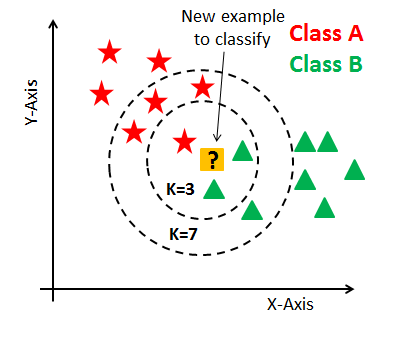

In [ ]:
from IPython.display import Image
# 출처: 데이터 캠프
Image('https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final_a1mrv9.png')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model_knc = KNeighborsClassifier()
model_knc  # n_neighbors=5 일반적으로 홀수 값으로 설정

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
model_knc.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
pred_knc = model_knc.predict(X_test)

In [ ]:
(pred_knc == y_test).mean()

1.0

hyper-parameter 튜닝해서 실습해 보기

In [ ]:
model_knc = KNeighborsClassifier(n_neighbors=7, leaf_size=20)
model_knc.fit(X_train, y_train)
knc_pred = model_knc.predict(X_test)
print(y_test.values)
print(knc_pred)

[1 1 2 2 2 1 0 2 2 0 1 1 1 1 0 2 0 1 0 0 2 2 0 1 2 0 2 2 1 2 0 0 0 1 1 1 0
 2]
[1 1 2 2 2 1 0 2 2 0 1 1 1 1 0 2 0 1 0 0 2 2 0 1 2 0 2 2 1 2 0 0 0 1 1 1 0
 2]


In [ ]:
(knc_pred == y_test).mean()

1.0

## 서포트 벡터 머신 (SVM; Support Vector Machine)
- (SVC; Support Vector Classifier)
- 새로운 데이터가 어느 카테고리에 속할지 판단하는 비확률적 이진 선형 분류 모델을 만듦.
- 경계로 표현되는 데이터들 중 가장 큰 폭을 가진 경계를 찾는 알고리즘.

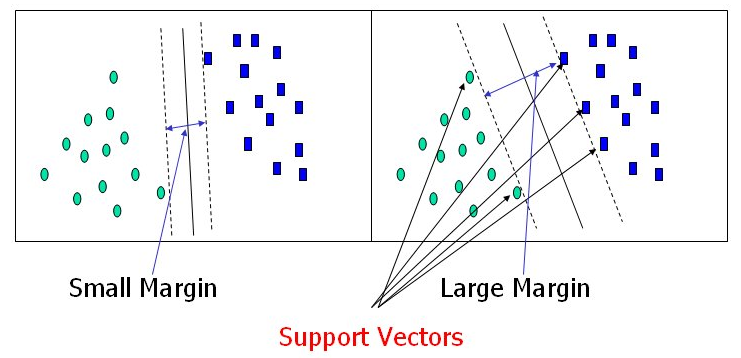

In [ ]:
Image('https://csstudy.files.wordpress.com/2011/03/screen-shot-2011-02-28-at-5-53-26-pm.png')

이진 분류만 가능함.(2개의 클래스 판별)
- OvsR 전략 사용
- hyperparameter 옵션

- [SVM scikit-learn 문서 참조](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

In [ ]:
from sklearn.svm import SVC

In [ ]:
model_svc = SVC(kernel="linear", C=10)
model_svc

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
model_svc.fit(X_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
pred_svc = model_svc.predict(X_test)

In [ ]:
pred_svc

array([1, 1, 2, 2, 2, 1, 0, 2, 2, 0, 1, 1, 1, 1, 0, 2, 0, 1, 0, 0, 2, 2,
       0, 1, 2, 0, 2, 2, 1, 2, 0, 0, 0, 1, 1, 1, 0, 2])

In [ ]:
(pred_svc == y_test).mean()

1.0

In [ ]:
pred_svc[:5]

array([1, 1, 2, 2, 2])

각 클래스(target 값)에 대한 확률값을 return 해주는 decision_function()

In [ ]:
# 클래스를 분류한 확률 정보 확인
model_svc.decision_function(X_test)[:5]

array([[-0.23926426,  2.28023685,  0.75592725],
       [-0.23873309,  2.25788457,  0.84262294],
       [-0.2664893 ,  1.18041355,  2.24577395],
       [-0.27962692,  1.18000795,  2.26709796],
       [-0.27749846,  0.83443234,  2.28541916]])

  SVC 학습모델의 속성값
  - n_support_: 각 클래스의 서포트의 개수
  - support_: 각 클래스의 서포트의 인덱스
  - support_vectors_: 각 클래스의 서포트의 x 값. x+와 x-
  - coef_: w 벡터
  - intercept_: −w0
  - dual_coef_: 각 원소가 ai⋅yi로 이루어진 벡터